# Žanre in popularnost

Pogledali smo najbolj popularne žanre oziroma kot netflix pravi pod kaj so filmi razvrščeni.
Imeli smo malo probleme z tem ker netfliova baza razvršča filme v čudne kategorije kot so Mednarodni filmi, zato sem mogel ročno opustit par zvrsti, ki se mi niso zdele pomembne.

Prvo smo naredili smo en graf, ki nam ne prece številsko ampak grafično nam prikaže katere žanre so najbolj popularne. 
Nato smo prikazali nekaj najbolj popularnih žanr ter njihove nabolj popularne filme, ampak predvsem nas je zanimalo kako se držijo ocene npr. kakšna je reazlika v grafu ocen top 200 izbrane žanre, torej za primer uzamemo drame, ki majo predvsem stabilne visoke ocene in npr Cult Movies, kjer pa nimajo tako stabilnih ocen namreč takoj opazimo da mamo par dobro ocenenih filmov nato pa graf kr pada.

In [4]:
import numpy as np
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt
base=pd.read_csv("Netflix_all.csv")

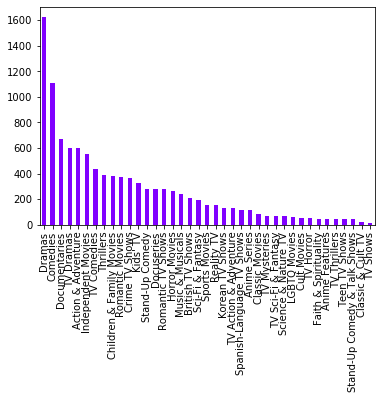

In [6]:
db = pd.DataFrame(base.listed_in.str.split(', ').tolist(), index=base.show_id).stack()

db = db.reset_index([0, 'show_id'])
db.columns = ['show_id', 'genre']
db = db[db.genre != "International Movies"]
db = db[db.genre != "International TV Shows"]
db = db[db.genre != "Movies"]

db['genre'].value_counts().plot(kind='bar', colormap='rainbow');

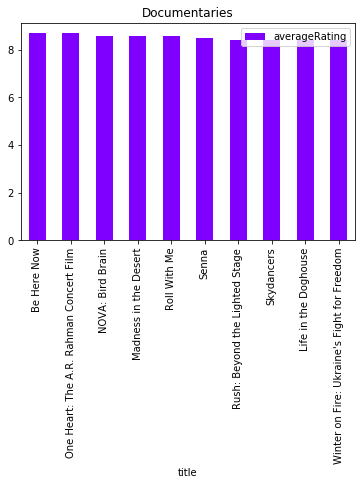

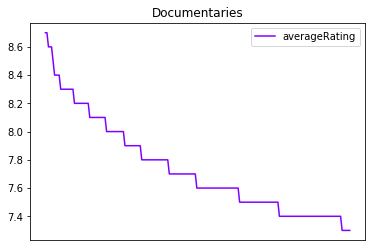

In [24]:
merge = base.merge(db, on='show_id')
merge = merge[merge.genre == "Documentaries"].sort_values(by='averageRating',ascending=False).head(200)
merge2 = merge[merge.genre == "Documentaries"].sort_values(by='averageRating',ascending=False).head(10)
merge = merge.drop(["show_id",'type', 'director', "cast", "country", "date_added", "release_year", "duration", "rating", "listed_in", "description", "numVotes", "month_added", "year_added"], axis=1)

merge2.plot(title="Documentaries", kind="bar", x="title", y="averageRating", colormap='rainbow');
merge.plot(title="Documentaries", x="title", y="averageRating", colormap='rainbow');

ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
plt.show()
plt.close()

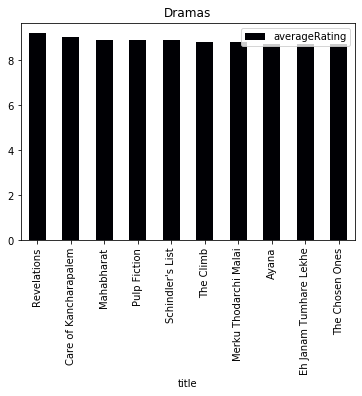

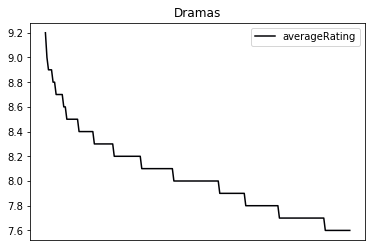

In [26]:
merge = base.merge(db, on='show_id')
merge = merge[merge.genre == "Dramas"].sort_values(by='averageRating',ascending=False).head(200)
merge2 = merge[merge.genre == "Dramas"].sort_values(by='averageRating',ascending=False).head(10)
merge = merge.drop(["show_id",'type', 'director', "cast", "country", "date_added", "release_year", "duration", "rating", "listed_in", "description", "numVotes", "month_added", "year_added"], axis=1)

merge2.plot(title="Dramas",kind="bar", x="title", y="averageRating", colormap='magma');
merge.plot(title="Dramas", x="title", y="averageRating", colormap='magma');

ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
plt.show()
plt.close()

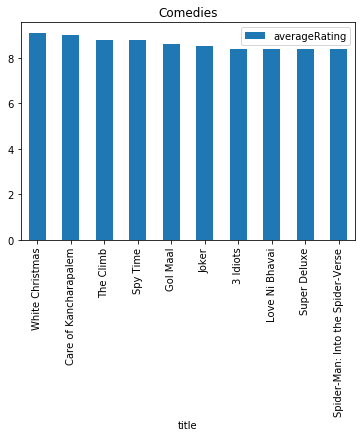

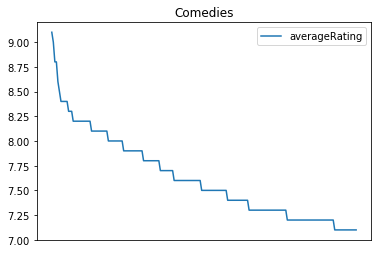

In [30]:
merge = base.merge(db, on='show_id')
merge = merge[merge.genre == "Comedies"].sort_values(by='averageRating',ascending=False).head(200)
merge2 = merge[merge.genre == "Comedies"].sort_values(by='averageRating',ascending=False).head(10)
merge = merge.drop(["show_id",'type', 'director', "cast", "country", "date_added", "release_year", "duration", "rating", "listed_in", "description", "numVotes", "month_added", "year_added"], axis=1)

merge2.plot(title="Comedies", x="title", y="averageRating", kind='bar', colormap='tab10');
merge.plot(title="Comedies", x="title", y="averageRating", colormap='tab10');

ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
plt.show()
plt.close()

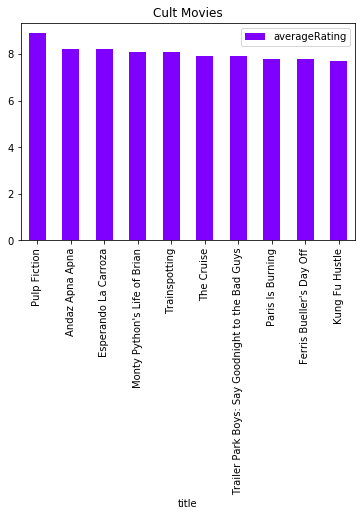

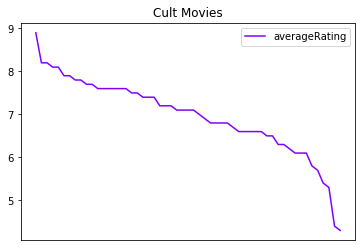

In [29]:
merge = base.merge(db, on='show_id')
merge = merge[merge.genre == "Cult Movies"].sort_values(by='averageRating',ascending=False).head(200)
merge2 = merge[merge.genre == "Cult Movies"].sort_values(by='averageRating',ascending=False).head(10)
merge = merge.drop(["show_id",'type', 'director', "cast", "country", "date_added", "release_year", "duration", "rating", "listed_in", "description", "numVotes", "month_added", "year_added"], axis=1)

merge2.plot(title="Cult Movies",x="title", y="averageRating", kind='bar', colormap='rainbow');
merge.plot(title="Cult Movies",x="title", y="averageRating", colormap='rainbow');

ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
plt.show()
plt.close()

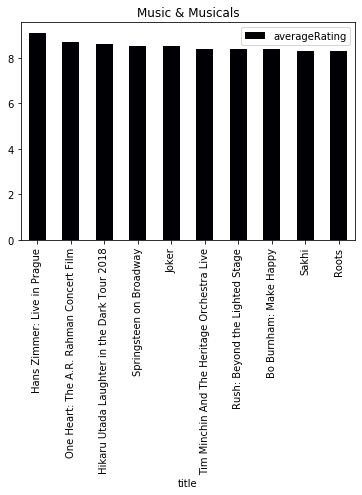

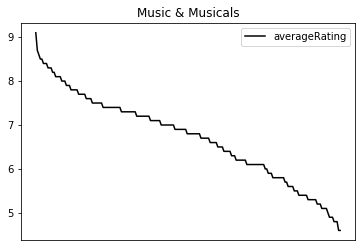

In [31]:
merge = base.merge(db, on='show_id')
merge = merge[merge.genre == "Music & Musicals"].sort_values(by='averageRating',ascending=False).head(200)
merge2 = merge[merge.genre == "Music & Musicals"].sort_values(by='averageRating',ascending=False).head(10)
merge = merge.drop(["show_id",'type', 'director', "cast", "country", "date_added", "release_year", "duration", "rating", "listed_in", "description", "numVotes", "month_added", "year_added"], axis=1)

merge2.plot(title="Music & Musicals",kind="bar", x="title", y="averageRating", colormap='magma');
merge.plot(title="Music & Musicals", x="title", y="averageRating", colormap='magma');

ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
plt.show()
plt.close()

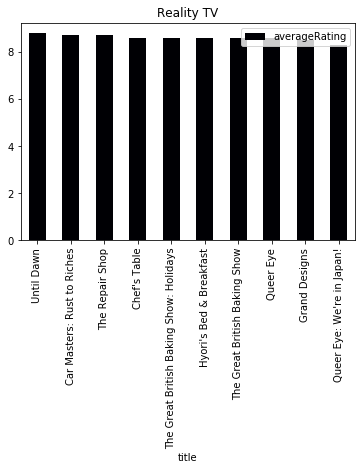

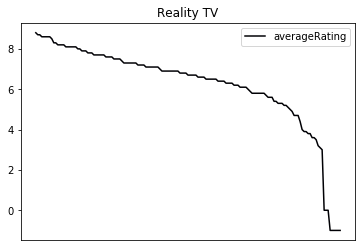

In [36]:
merge = base.merge(db, on='show_id')
merge = merge[merge.genre == "Reality TV"].sort_values(by='averageRating',ascending=False)
merge2 = merge[merge.genre == "Reality TV"].sort_values(by='averageRating',ascending=False).head(10)
merge = merge.drop(["show_id",'type', 'director', "cast", "country", "date_added", "release_year", "duration", "rating", "listed_in", "description", "numVotes", "month_added", "year_added"], axis=1)

merge2.plot(title="Reality TV",kind="bar", x="title", y="averageRating", colormap='magma');
merge.plot(title="Reality TV", x="title", y="averageRating", colormap='magma');

ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
plt.show()
plt.close()